<a href="https://colab.research.google.com/github/michaelprinc/Python/blob/master/Cognitive_class_Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10)

df_can.tail()

df_can.info()

df_can.columns.values 

df_can.index.values

print(type(df_can.columns))
print(type(df_can.index))

df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

# size of dataframe (rows, columns)
df_can.shape

# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

df_can['Total'] = df_can.sum(axis=1)

df_can.isnull().sum()

df_can.describe()

df_can.Country  # returns a series

df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

df_can.head(3)

# optional: to remove the name of the index
df_can.index.name = None

# 1. the full row data (all columns)
print(df_can.loc['Japan'])

# alternate methods
print(df_can.iloc[87])
print(df_can[df_can.index == 'Japan'].T.squeeze())

# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

Data read into a pandas dataframe!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 n

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


Matplotlib version:  3.1.1
['dark_background', 'seaborn-white', 'Solarize_Light2', 'seaborn-deep', 'seaborn', 'seaborn-colorblind', 'seaborn-dark-palette', '_classic_test', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-talk', 'ggplot', 'seaborn-dark', 'tableau-colorblind10', 'seaborn-notebook', 'seaborn-muted', 'classic', 'seaborn-pastel', 'grayscale', 'fast', 'seaborn-darkgrid', 'seaborn-ticks', 'bmh', 'seaborn-poster', 'seaborn-paper', 'seaborn-bright']


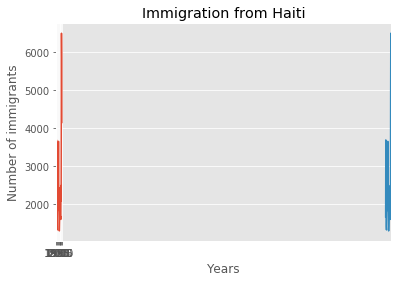

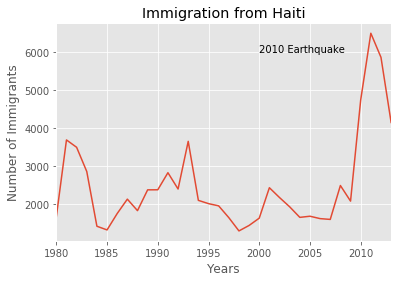

In [2]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

haiti.plot()

haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 


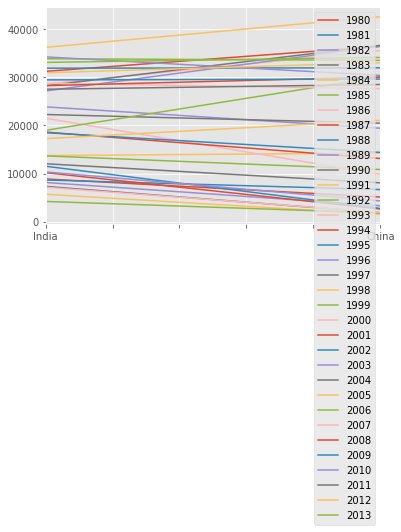

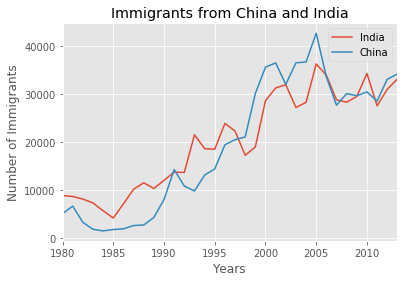

In [3]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

df_CI.plot(kind='line')

df_CI = df_CI.transpose()
df_CI.head()

df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

      India  China  ...  Philippines  Pakistan
1980   8880   5123  ...         6051       978
1981   8670   6682  ...         5921       972
1982   8147   3308  ...         5249      1201
1983   7338   1863  ...         4562       900
1984   5704   1527  ...         3801       668
1985   4211   1816  ...         3150       514
1986   7150   1960  ...         4166       691
1987  10189   2643  ...         7360      1072
1988  11522   2758  ...         8639      1334
1989  10343   4323  ...        11865      2261
1990  12041   8076  ...        12509      2470
1991  13734  14255  ...        12718      3079
1992  13673  10846  ...        13670      4071
1993  21496   9817  ...        20479      4777
1994  18620  13128  ...        19532      4666
1995  18489  14398  ...        15864      4994
1996  23859  19415  ...        13692      9125
1997  22268  20475  ...        11549     13073
1998  17241  21049  ...         8735      9068
1999  18974  30069  ...         9734      9979
2000  28572  

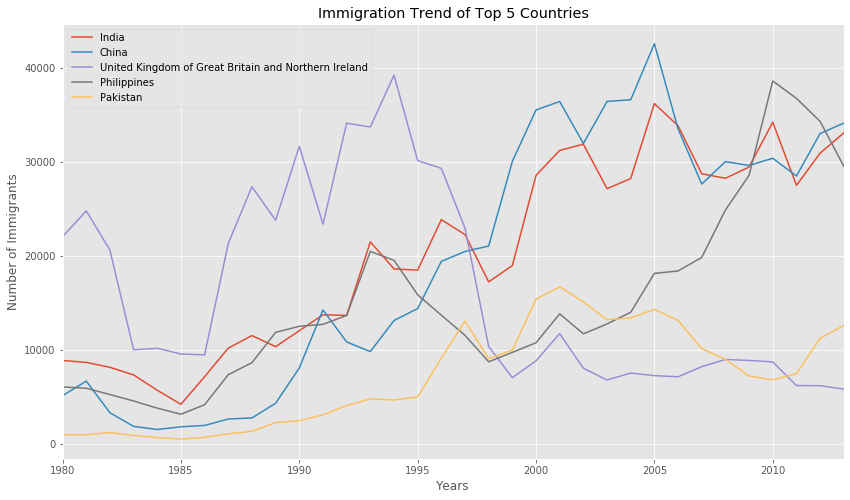

In [5]:
# Step 1: Get the dataset. Recall that we created a Total column that calculates the cumulative immigration by country. \\ We will sort on this column to get our top 5 countries using pandas sort_values() method.
#inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

print(df_top5)

# Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()
